In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Importing the data and converting it to usable numpy arrays


Dataset - https://www.kaggle.com/datasets/kanths028/usa-housing?resource=download

In [55]:
df = pd.read_csv("USA_Housing.csv")

df = df.iloc[:,:-1]
print(df)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0                             4.09     2308

In [57]:

x_train = df.to_numpy()
print(f"x_train before edit: {x_train}\n")

# storing price in y_train (copying last column of each row from x_train to y_train)
y_train = np.zeros(len(x_train))
for i in range(len(x_train)):
    y_train[i] = x_train[i,-1]
    
print(f"y_train : {y_train}\n")    

# Now, removing the last column from x_train
x_train = np.delete(x_train,-1,1)
print(f"x_train after edit: {x_train}\n")

#refer to link - https://note.nkmk.me/en/python-numpy-delete/

#checking the size of x_train and y_train
print(f"input size: {x_train.shape}")
print(f"output size: {y_train.shape}")

x_train before edit: [[7.95454586e+04 5.68286132e+00 7.00918814e+00 4.09000000e+00
  2.30868005e+04 1.05903356e+06]
 [7.92486425e+04 6.00289981e+00 6.73082102e+00 3.09000000e+00
  4.01730722e+04 1.50589091e+06]
 [6.12870672e+04 5.86588984e+00 8.51272743e+00 5.13000000e+00
  3.68821594e+04 1.05898799e+06]
 ...
 [6.33906869e+04 7.25059061e+00 4.80508098e+00 2.13000000e+00
  3.32661455e+04 1.03072958e+06]
 [6.80013312e+04 5.53438842e+00 7.13014386e+00 5.44000000e+00
  4.26256202e+04 1.19865687e+06]
 [6.55105818e+04 5.99230531e+00 6.79233610e+00 4.07000000e+00
  4.65012838e+04 1.29895048e+06]]

y_train : [1059033.55787012 1505890.91484695 1058987.98787608 ... 1030729.58315229
 1198656.87240769 1298950.48026696]

x_train after edit: [[7.95454586e+04 5.68286132e+00 7.00918814e+00 4.09000000e+00
  2.30868005e+04]
 [7.92486425e+04 6.00289981e+00 6.73082102e+00 3.09000000e+00
  4.01730722e+04]
 [6.12870672e+04 5.86588984e+00 8.51272743e+00 5.13000000e+00
  3.68821594e+04]
 ...
 [6.33906869e+04 

# Now , we have the data in required organized way.

Text(0, 0.5, 'Price of House(in millions)')

<Figure size 640x480 with 0 Axes>

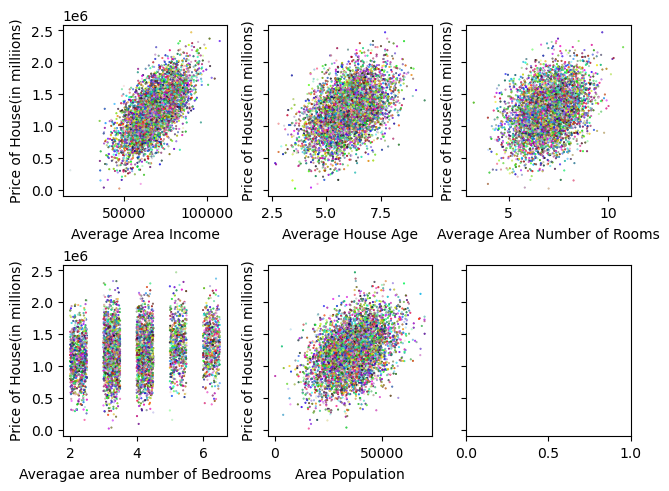

In [59]:
#Visualizing the data
f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 3, sharey = True, constrained_layout=True)

axes[0][0].scatter(x_train[:,0], y_train, c = np.random.rand(len(x_train[:,0]),3), marker = ".", s=1)
axes[0][0].set_xlabel('Average Area Income', labelpad = 5)
axes[0][0].set_ylabel('Price of House(in milliions)', labelpad = 5)

axes[0][1].scatter(x_train[:,1], y_train, c = np.random.rand(len(x_train[:,1]),3), marker = ".", s=1)
axes[0][1].set_xlabel('Average House Age', labelpad = 5)
axes[0][1].set_ylabel('Price of House(in millions)', labelpad = 5)

axes[0][2].scatter(x_train[:,2], y_train, c = np.random.rand(len(x_train[:,2]),3), marker = ".", s=1)
axes[0][2].set_xlabel('Average Area Number of Rooms', labelpad = 5)
axes[0][2].set_ylabel('Price of House(in millions)', labelpad = 5)

axes[1][0].scatter(x_train[:,3], y_train, c = np.random.rand(len(x_train[:,3]),3), marker = ".", s=1)
axes[1][0].set_xlabel('Averagae area number of Bedrooms', labelpad = 5)
axes[1][0].set_ylabel('Price of House(in millions)', labelpad = 5)

axes[1][1].scatter(x_train[:,4], y_train, c = np.random.rand(len(x_train[:,4]),3), marker = ".", s=1)
axes[1][1].set_xlabel('Area Population', labelpad = 5)
axes[1][1].set_ylabel('Price of House(in millions)', labelpad = 5)


# Feature Scaling (because the range of feature values is high)

In [61]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm)

# Cost function

The term 'cost' might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  


In [63]:
def cost_function(x,y,w,b):
    
    m,n = x.shape
    cost=0
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        cost += (f_wb - y[i])**2
    cost = cost / (2*m)
    
    return cost

# Gradient Descent


The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value




In [64]:
def compute_gradient(x,y,w,b):
    
    m,n = x.shape
    
    # required 2 variable that we need to compute
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b;
        temp = f_wb - y[i]
        for j in range(n):
            dj_dw += temp*x[i,j]
        dj_db += temp
    dj_db = dj_db / m
    dj_dw = dj_dw / m
    
    return dj_dw, dj_db

# Gradient Descent

In [65]:
def gradient_descent(x,y,w,b,aplha,num_iter):
    
    m,n = x.shape
    count = num_iter / 10
    for i in range(num_iter):
        
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if (i == count):
            print(f"iteration {count}: w: {w} and b: {b}\n")
            print(f"cost: {cost_function(x,y,w,b)}\n\n")
            count += (num_iter / 10)
        
    
    return w,b

# Finding optimal w and b using above training set and normalized features


In [67]:
# finding w,b using above model
x_norm =  zscore_normalize_features(x_train)

w = np.zeros(5)
b = 0
alpha = 5.0e-2
w_final,b_final = gradient_descent(x_norm, y_train, w, b, alpha, 10000)
print(f"\nw_final: {w_final} and b_final: {b_final}")

iteration 1000.0: w: [121748.84625865 121748.84625865 121748.84625865 121748.84625865
 121748.84625865] and b: 1232072.6541423548

cost: 19183538429.37542


iteration 2000.0: w: [121748.84625865 121748.84625865 121748.84625865 121748.84625865
 121748.84625865] and b: 1232072.6541423548

cost: 19183538429.37542


iteration 3000.0: w: [121748.84625865 121748.84625865 121748.84625865 121748.84625865
 121748.84625865] and b: 1232072.6541423548

cost: 19183538429.37542


iteration 4000.0: w: [121748.84625865 121748.84625865 121748.84625865 121748.84625865
 121748.84625865] and b: 1232072.6541423548

cost: 19183538429.37542


iteration 5000.0: w: [121748.84625865 121748.84625865 121748.84625865 121748.84625865
 121748.84625865] and b: 1232072.6541423548

cost: 19183538429.37542


iteration 6000.0: w: [121748.84625865 121748.84625865 121748.84625865 121748.84625865
 121748.84625865] and b: 1232072.6541423548

cost: 19183538429.37542


iteration 7000.0: w: [121748.84625865 121748.84625865 1217

Now, we can simply use the above values to predict housing using above values of x and y. We could even make a predict function that would simplify taking input for each feature from user (0, in case none is provided) and then we can predict price base on that.

Jupyter notebook was taking quite a lot of time with the code, so, instead you can run this code in google colab and use virtual resources to compute faster.

In [37]:
def predict():
    x = np.array([])
    pred_cost = 0
    
    x[0,1] = int(input("Enter Average area income: "))
    x[0,2] = int(input("Enter Average House Age: "))
    x[0,3] = int(input("Enter Number of Rooms: "))
    x[0,4] = int(input("Enter Number of Bedrooms: ")
    x[0,5] = int(input("Enter Area Population: "))
    
    pred_cost = np.dot(x,w_final)+b
    print("\nThe predicted cost of house is: ", pred_cost)

In [ ]:
calling the predict() function
predict()